In [1]:
from strategy import macd_momentum, macd
from strategy.position import Position
from strategy.base import BaseStrategy, StrategyVariables
import pandas as pd
import matplotlib.pyplot as plt

def parseData(data: pd.DataFrame):
    data["datetime"] = pd.to_datetime(data["close_time"], unit='ms')
    data["Close"] = data["close"].astype(float)
    return data[['datetime', 'Close']]

def back_test(data: pd.DataFrame, strategy: BaseStrategy):
    res = strategy.create_pandas()

    for i in range(100, len(data)):
        current_data = data.copy().iloc[i-100:i]
        variables: StrategyVariables = strategy.execute(current_data)
        # print(variables)
        strategy.save_to_pandas(data=res, variables=variables)

    return res

def processData(path: str, strategy: BaseStrategy,):
    raw_data = pd.read_csv(path)
    parse_data = parseData(raw_data)
    res = back_test(parse_data, strategy, )
    return res

def plot(res: pd.DataFrame):
    x = res["datetime"]
    y = res["founds"]

    plt.figure(figsize=(20, 5))
    plt.plot(x, y)
    y = res["gained"]

    plt.figure(figsize=(20, 5))
    plt.plot(x, y)
    y = res["last_price"]

    plt.figure(figsize=(20, 5))
    plt.plot(x, y)

In [2]:
position = Position()
strategy: BaseStrategy = macd_momentum.Strategy(position=position)
BTC = processData("backtesting/BTCUSDT-1m-2023-11-01.csv", strategy)

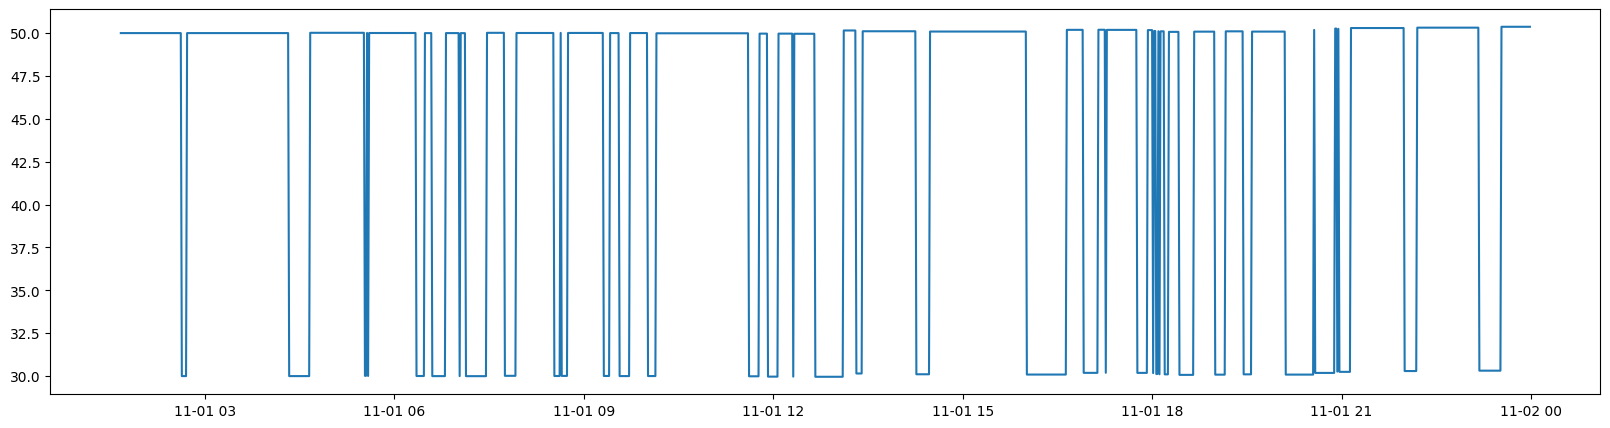

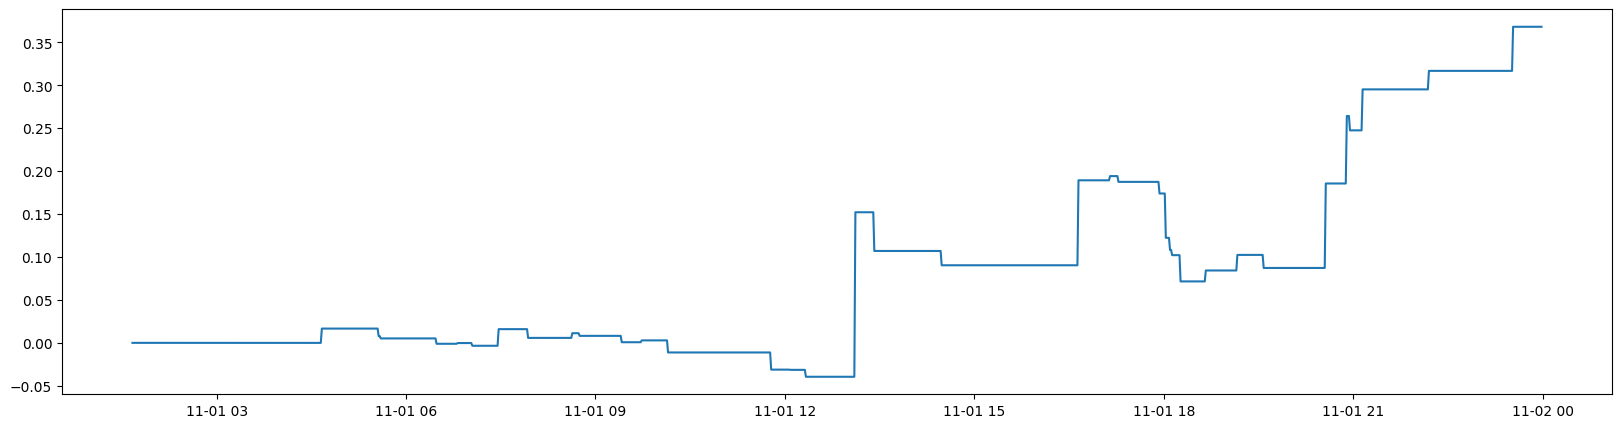

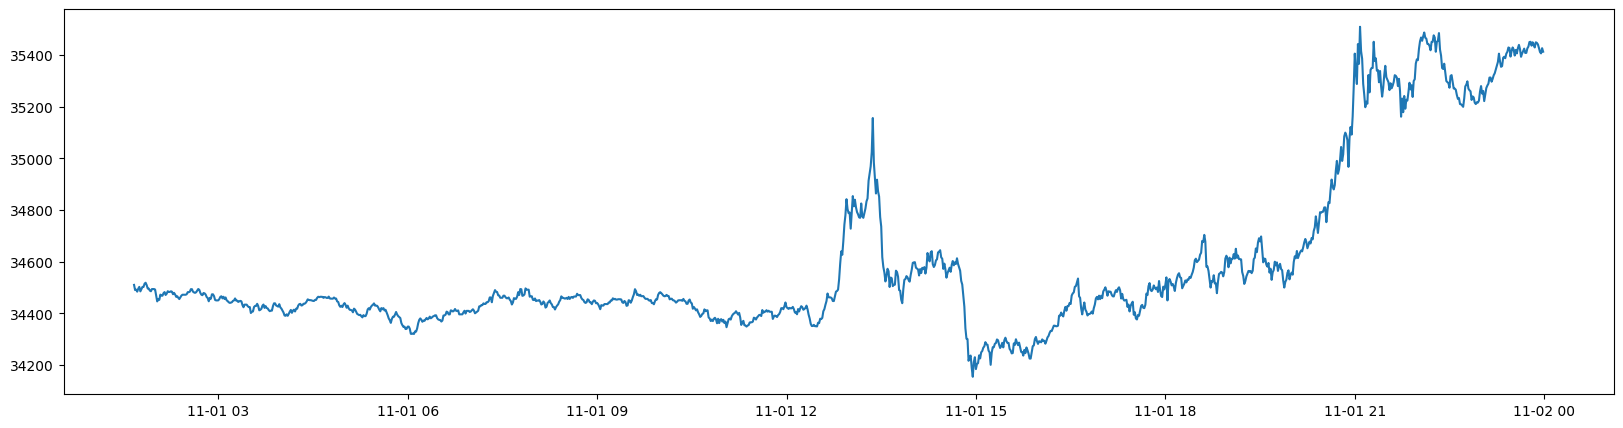

In [3]:
plot(BTC)

In [4]:
position = Position()
strategy: BaseStrategy = macd.Strategy(position=position, ticker_name="BTCUSDT")
BTC = processData("backtesting/BTCUSDT-1m-2023-11-01.csv", strategy)

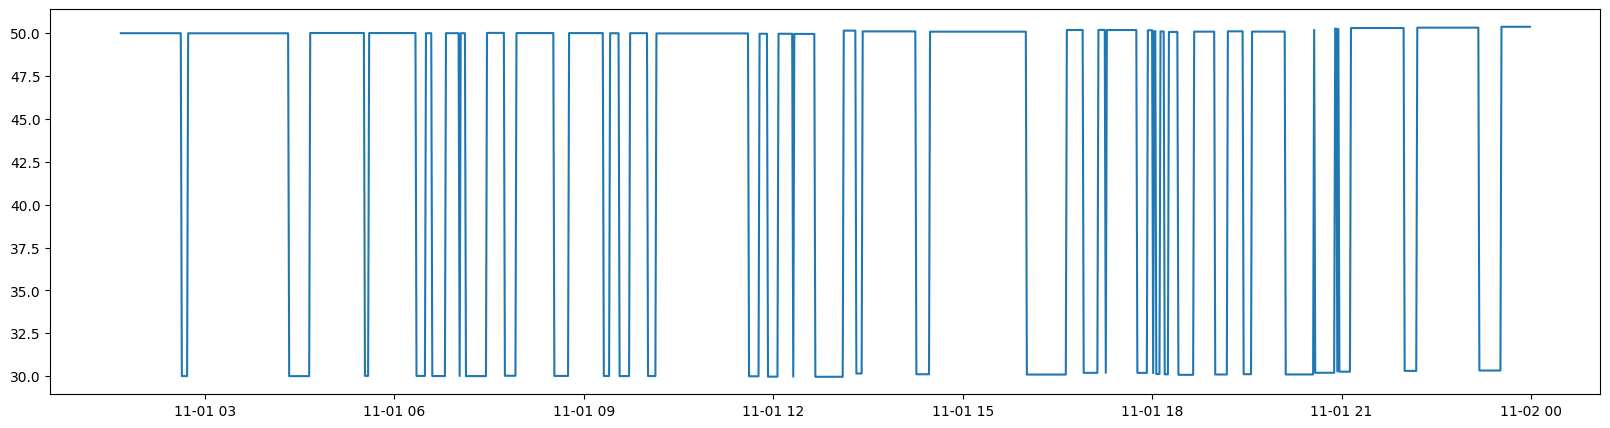

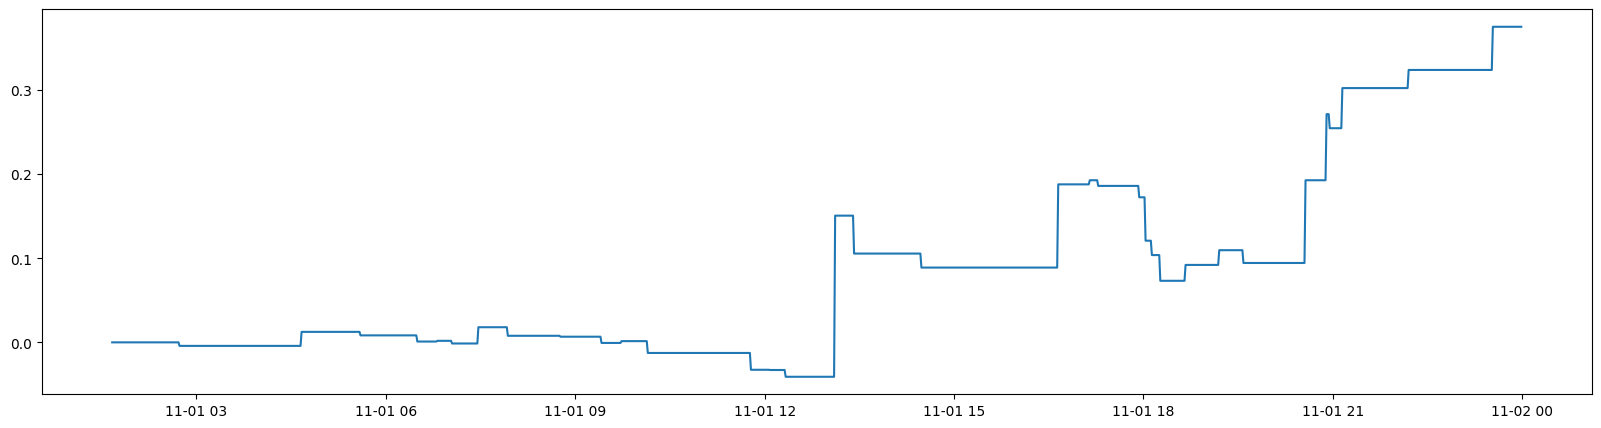

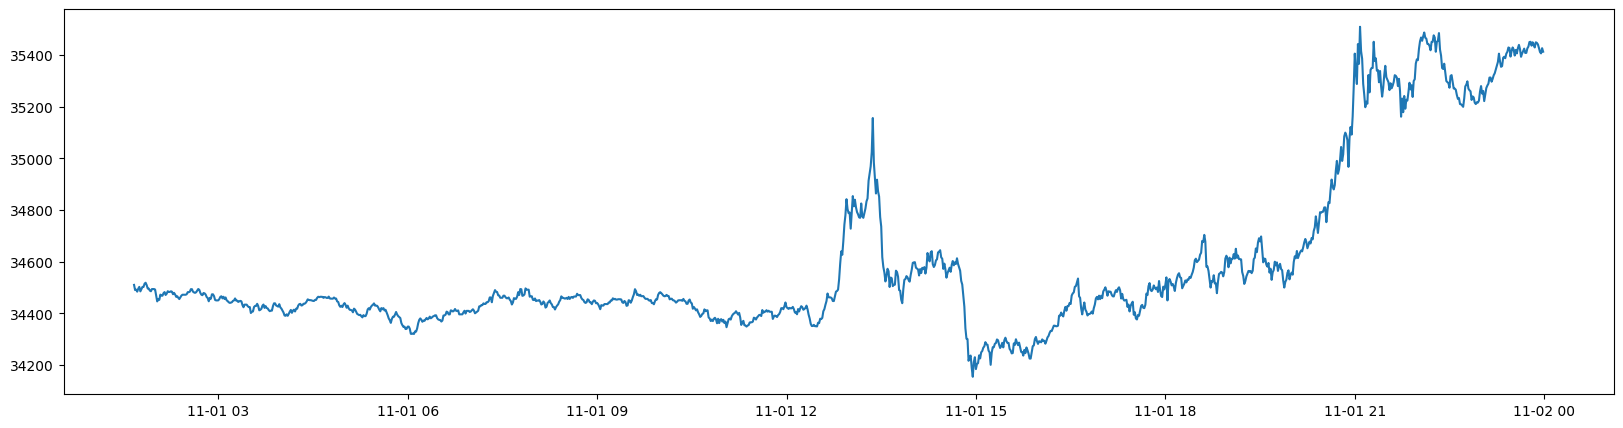

In [5]:
plot(BTC)